In [1]:
#Let's read the dataset
import pandas as pd
df = pd.read_csv("../heart.csv")

Today is the 14 Day of our Machile Learning challenge where we will write a code in order to learn Machine Learning every single day.
Today we will build mini project Dataset Cleaning and Preprocessing. We will do EDA for dataset, than detect outliers and remove them.
Finally we will Preprocesses (scaling, encoding), make it ready for preparing our model.

In [2]:
#Let's se the dataframe
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In this dataframe we have information about heart health of the person and target column which is prediction and by training our model we should predict this column

In [3]:
#First of all let's see how many missing values in our dataset
df.isnull().sum()
#Laright we don't have any None values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
#As we know there is no any missing values and all values are numericla in ourd dataset, let's see the correlation in our dataframe
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


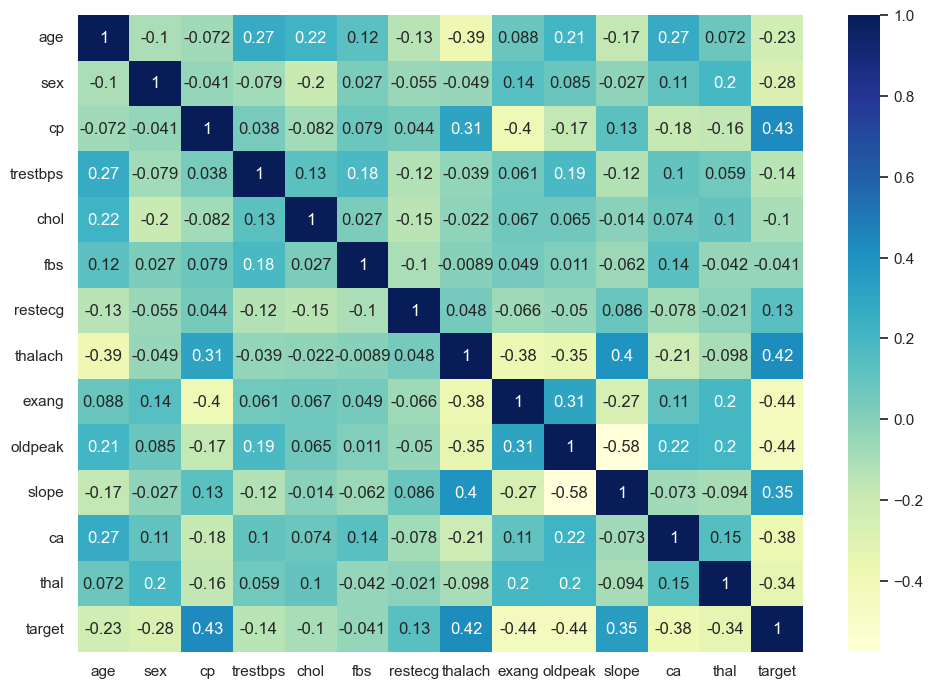

In [5]:
#Let's see also heatmap of it 
import seaborn as sns
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

Now we can see that to our target column "Thalach","CP" feature effects the most positively and from negative site "Exang", "Oldpeak", "Age", "Sex" influences the most.

And the features which doens't effect are "FBS", "Chol", "Restecg"

In [6]:
#Let's try to find the lenght of outliers uzing Z score value 
#We will set threshold as 3 in dataset
threshold = 3
for column in df.columns:
    number_of_outliers = 0
    column_mean = df[column].mean()
    column_std = df[column].std()
    for val in df[column].values:
        z_score = (val - column_mean) / column_std
        if z_score > threshold:
            number_of_outliers += 1
    print(column, "Length of outliers ", number_of_outliers)

age Length of outliers  0
sex Length of outliers  0
cp Length of outliers  0
trestbps Length of outliers  7
chol Length of outliers  13
fbs Length of outliers  0
restecg Length of outliers  0
thalach Length of outliers  0
exang Length of outliers  0
oldpeak Length of outliers  7
slope Length of outliers  0
ca Length of outliers  18
thal Length of outliers  0
target Length of outliers  0


In [7]:
#let's detect the outliers also by using IQR, this helps to find extreme values
#In order to find the lower and upper limits we need to find 25% and 75% of values of columns
#For that we can use describe method from pandas
desribed_df = df.describe()
desribed_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
#First of all let's collect into one our numerical values in which we cann detect outliers as there are some numerical values which are categorical converted into numerical
numerical_columns = ["age", "trestbps", "chol", "thalach", "oldpeak", "ca"]
#Let's go one by one from this columns and remove the outliers from the dataset
for col in numerical_columns:
    IQR = desribed_df[col]["75%"] - desribed_df[col]["25%"]
    lower_limit = desribed_df[col]["25%"] - 1.5 * IQR
    upper_limit = desribed_df[col]["75%"] + 1.5 * IQR
    df = df[df[col] < upper_limit][df[df[col] < upper_limit][col] > lower_limit]

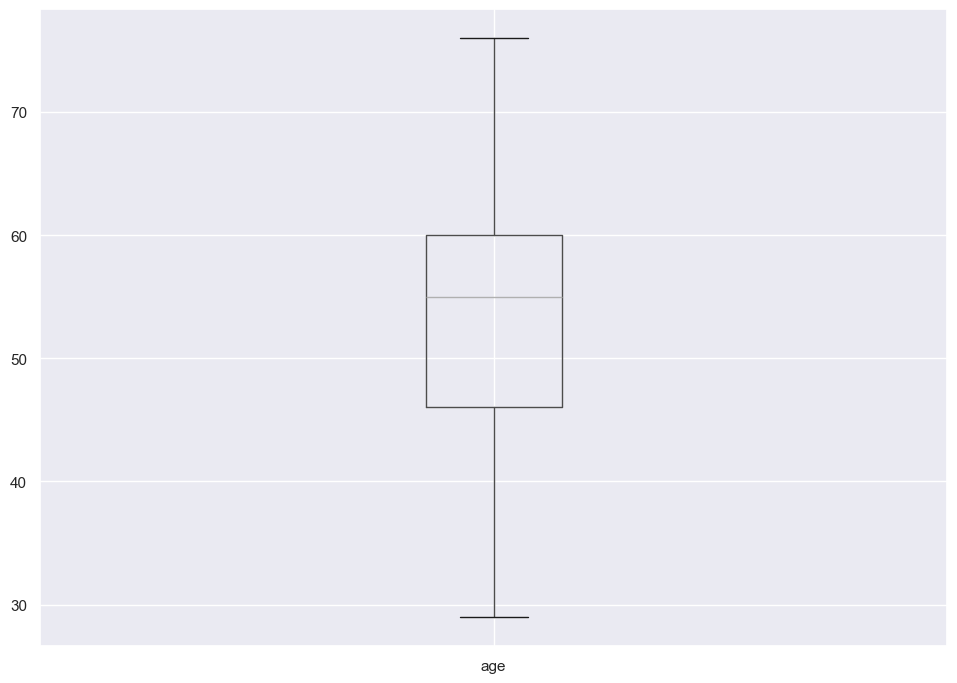

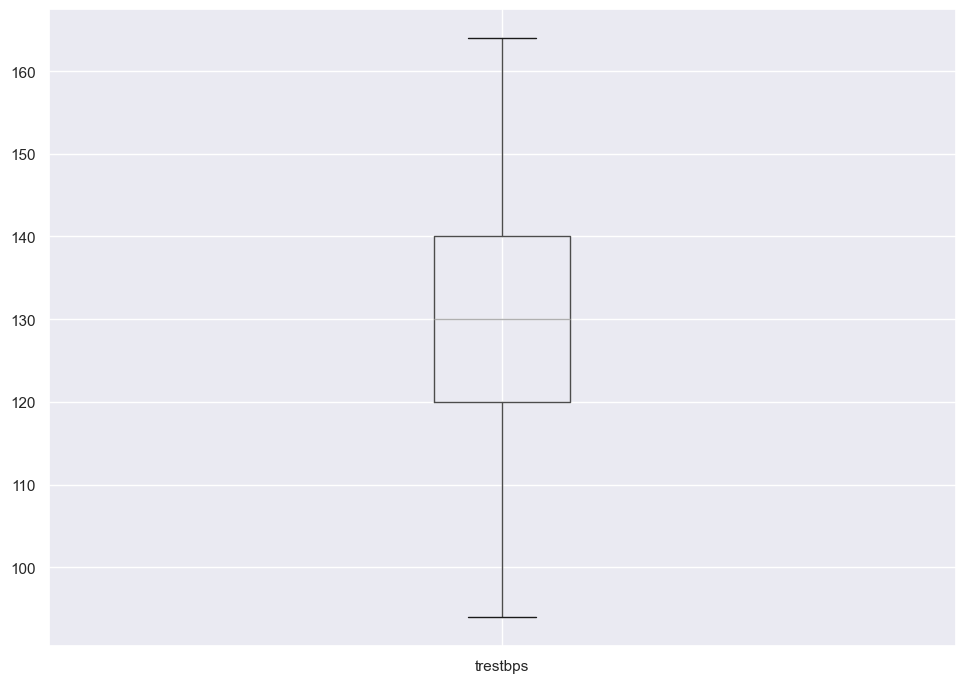

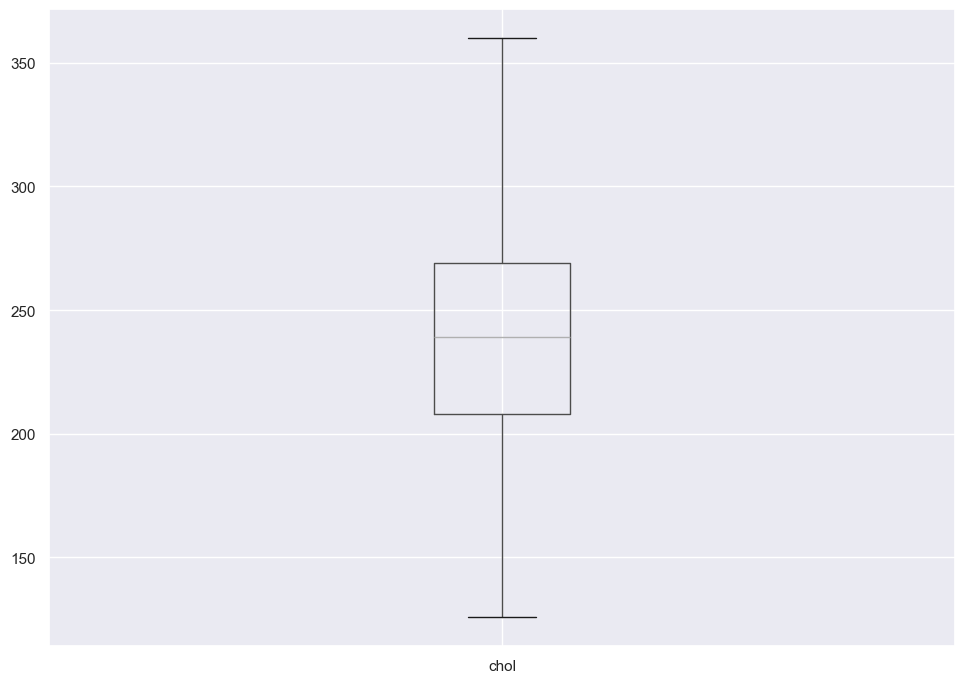

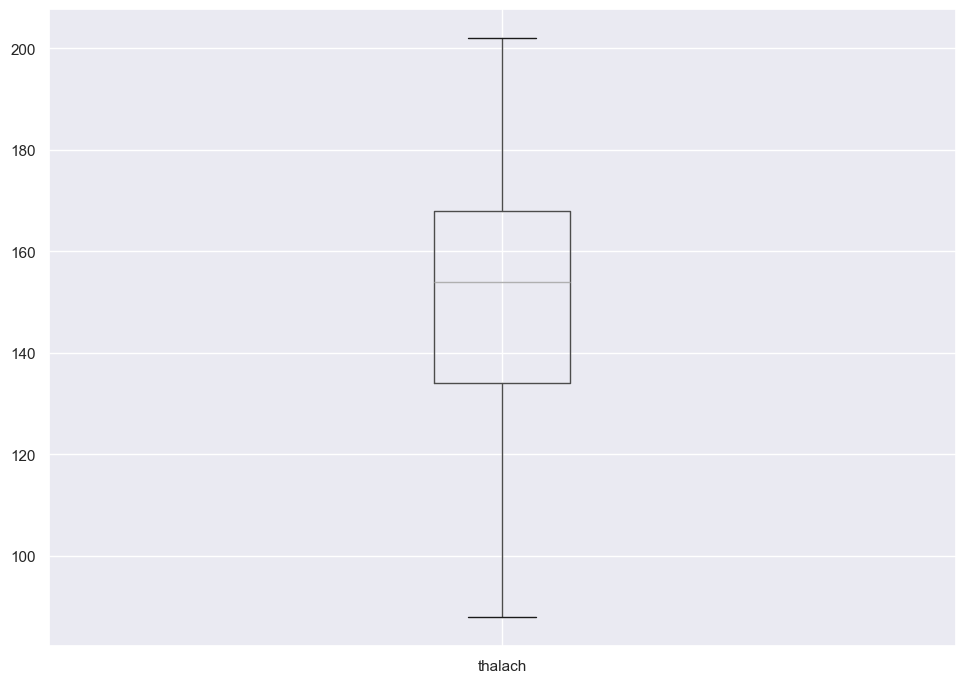

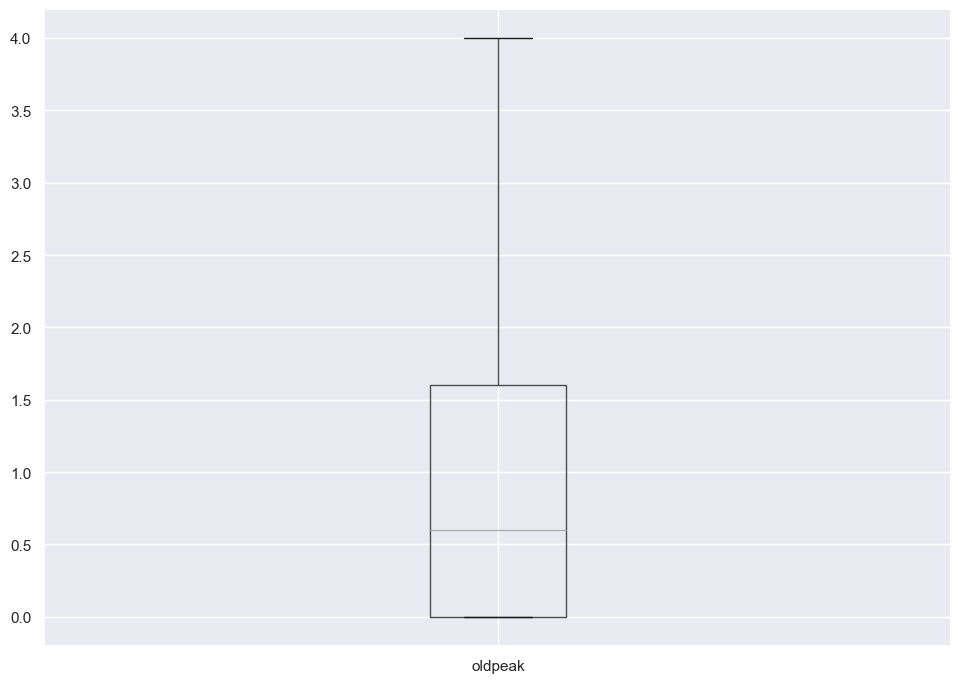

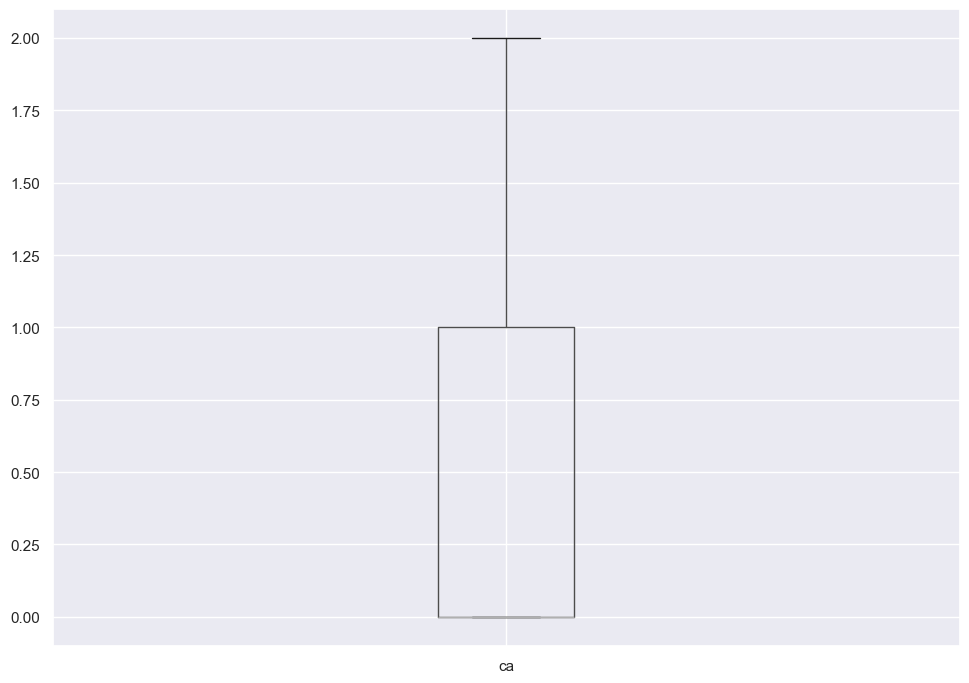

In [9]:
#Now after removing missing values from dataset using the IQR method we can see that our we left only 873 datas. Outiers were removed from the dataset
import matplotlib.pyplot as plt
for column in numerical_columns:
    plt.figure()
    df.boxplot([column])

#If we plot the boxplots from the plots we can be sure that there are not any outliers in dataset.

In [10]:
#Our next step will be Scaling our dataset. Let's Normalize it. Now also we will normalize our numerical feature columns
for col in numerical_columns:
    #Let's find std and mean of our feature
    std = df[col].std()
    mean = df[col].mean()
    #Here we will write formula of standard scaler and apply it for every row
    df[col] = df[col].apply(lambda x: (x - mean) / std)

#We applied normalization to the numerical features


#Now let's remove features that has less effect to the output as our model can have better predictions.Yes we did correlation before but after normalization correlation could change
df.corr()

In [15]:
columns_with_less_effect = ["trestbps", "chol", "fbs"]
#We can see that these 3 columns correlation is less than 0.1 even. I think we can drop these columns as they don't have enough effect to our target value.
#Getting them rid of can only help our model.
df = df.drop(columns=columns_with_less_effect)

In [16]:
#this is the final look of our dataset I think now we are ready to train our model
df

,age,sex,cp,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.193754,1,0,1,0.770877,0,0.030146,2,2.040848,3,0
1,-0.083056,1,0,0,0.199217,1,2.047148,0,-0.725705,3,0
2,1.798818,1,0,1,-1.119998,1,1.566910,0,-0.725705,3,0
3,0.802532,1,0,1,0.463060,0,-0.930332,2,0.657571,3,0
5,0.470437,0,0,0,-1.251919,0,0.030146,1,-0.725705,2,1
...,...,...,...,...,...,...,...,...,...,...,...
1020,0.581135,1,1,1,0.594982,1,-0.930332,2,-0.725705,2,1
1021,0.691834,1,0,0,-0.416417,1,1.759005,1,0.657571,3,0
1022,-0.747246,1,0,0,-1.427815,1,0.030146,1,0.657571,2,0
1023,-0.415151,0,0,0,0.375112,0,-0.930332,2,-0.725705,2,1


In [ ]:
Today was 14 day of our challenge. Today we build Mini-Project: Dataset Cleaning and Preprocessing. 
We performed:
1 - EDA (Exploratory Data Analysis)
2 - Outlier detection (using Z-score or IQR to find extreme values)
3 - Feature scaling (StandardScaler). 
4 - Feature selection (remove less important features using correlation)